<a href="https://colab.research.google.com/github/mherbert93/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

df = df.replace({'y' : 1, 'n' : 0, '?' : np.NaN})

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = data.dropna() #do not include nulls
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # pass extra parameter (ddof=1) to calculate **sample** standard deviation
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  # Lookup the t-statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom: 49
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [199]:
rep.shape

(168, 17)

In [0]:
from scipy import stats
#rep = rep.dropna() #drop rows that contain null values
rep_mean, rep_lower, rep_upper = confidence_interval(rep['right-to-sue'])

In [201]:
rep['right-to-sue'].isnull().sum()

10

In [202]:
print(rep_mean) #mean
print(rep_lower) #upper confidence interval
print(rep_upper) #lower confidence interval

0.8607594936708861
0.8061858971620528
0.9153330901797194


In [203]:
rep['right-to-sue'].mean()

0.8607594936708861

In [204]:
rep.shape

(168, 17)

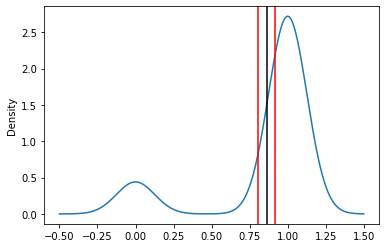

In [205]:
import matplotlib.pyplot as plt


rep['right-to-sue'].plot.density()

plt.axvline(x=rep_lower, color='red') #lower
plt.axvline(x=rep_mean, color='black') #mean
plt.axvline(x=rep_upper, color='red'); #upper
plt.show()

The upper and lower confidence intervals show us if we were to run this test 100 times, the mean would fall within that range 95% of the time.

# Part 2

In [206]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?") #mark values " ?" contained in dataaset as null.
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [207]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [0]:
def combine_marriage(value):
  return "Married" if (value == " Married-civ-spouse" or value == " Separated" or value == " Widowed" or value == " Married-spouse-absent" or value == " Married-AF-spouse") else "Unmarried"
  #anyone that is flagged married(and widowed), is changed to "Married". All others are unmarried(including divorce, as this was an intention act, where as say widow is not)

In [0]:
df['marital-status'] = df['marital-status'].apply(combine_marriage) 

In [210]:
df['marital-status'].value_counts() #verify new marital status

Married      17435
Unmarried    15126
Name: marital-status, dtype: int64

In [211]:
observed_frequencies = pd.crosstab(df['marital-status'], df['race'], margins=True)

observed_frequencies

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
marital-status,,,,,,
Married,148,592,1293,140,15262,17435
Unmarried,163,447,1831,131,12554,15126
All,311,1039,3124,271,27816,32561


In [212]:
observed = pd.crosstab(df['marital-status'], df['race'])

observed = observed.values

observed.shape

(2, 5)

In [213]:
row_s = observed_frequencies.iloc[0:2, 5:].values 
row_s = row_s.T[0]

row_s

array([17435, 15126])

In [214]:
col_s = observed_frequencies.iloc[2:, 0:5].values
col_s = col_s[0]

col_s

array([  311,  1039,  3124,   271, 27816])

In [215]:
t_total = df.shape[0]

t_total

32561

In [216]:
observed.shape

(2, 5)

Null Hypothesis: The two variables are independent

Alternative: The two variables are dependent (there is a relationship between them)

Confidence Level: 95%

In [217]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed) #chi2 using scipy

print("chi2 value is: " + str(chi2))
print("p-value is: " + str(p_value))

chi2 value is: 214.88698923923178
p-value is: 2.36094937461306e-45


Based on the chi2 statistic of 214 and p-value of ~0, we reject the null hypothosis and accept the alternative hypothosis. The marriage rate between races is not the same.

# Additional Code For Manual Calculation

In [218]:
expected = []
for i in range(len(row_s)):
  expected_row = []
  for column in col_s:
    expected_val = column*row_s[i]/t_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 5)
[[  166.52698013   556.33933233  1672.76619268   145.10871902
  14894.25877584]
 [  144.47301987   482.66066767  1451.23380732   125.89128098
  12921.74122416]]


In [219]:
observed.shape

(2, 5)

In [0]:
chi2 = ((observed-expected)**2 / expected).sum() #manually calculated chi2

In [222]:
chi2

214.88698923923178

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)